# Analysis of unstructured data

### Marcin Jakubwski, Dominika Struzik

## ASSIGNMENT 2

At first we needed to choose the nft collection that we wantedto scrape. We decided to choose *space_toadz*, because they draw our attention. 

In [667]:
from bs4 import BeautifulSoup
import requests
import unidecode
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import json_normalize

### Part 1
#### Data gathering 

In [214]:
import requests
import json
from bs4 import BeautifulSoup
import time

i=0
link = []
data_nft = {}

while i != None:
    i=str(i)
    link = 'https://fcd.terra.dev/v1/txs?offset='+i+'&limit=100&account=terra1ycp3azjymqckrdlzpp88zfyk6x09m658c2c63d'
    data_i = requests.get(link)#, timeout=60)
    data_i = data_i.json() 
    data_nft.update({i : data_i})
    i = int(data_i['next'])
    time.sleep(30)
    


KeyboardInterrupt: 

In [225]:
i=169402880
link = []
#data_nft = {}

while i != None:
    #i=str(i)
    link = 'https://fcd.terra.dev/v1/txs?offset=%27'+str(i)+'%27&limit=100&account=terra1ycp3azjymqckrdlzpp88zfyk6x09m658c2c63d'
    data_i = requests.get(link)#, timeout=60)
    data_i = data_i.json() 
    data_nft.update({i : data_i})
    i = int(data_i['next'])
    time.sleep(15)

KeyError: 'next'

Length of iterations

In [797]:
len(data_nft.values())

187

Last value of *next* key

In [798]:
list(data_nft)[-1]

169175183

In [799]:
data_nft.keys()

dict_keys(['0', '172119265', '172060082', '172022904', '171981701', '171925579', '171864359', '171813154', '171779063', '171662252', '171601360', '171530992', '171418740', '171380759', '171329682', '171215447', '171150891', '171110971', '171067620', '171031864', '170979123', '170930527', '170864989', '170794470', '170723718', '170679822', '170650044', '170621815', '170599546', '170559201', '170539039', '170507413', '170473973', '170430130', '170387743', '170333199', '170299286', '170276714', '170239463', '170213125', '170191749', '170177138', '170160482', '170132251', '170113610', '170097868', '170084453', '170074205', '170061047', '170048423', '170033960', '170018751', '170004977', '169987126', '169972989', '169958517', '169945232', '169927566', '169908961', '169894778', '169873985', '169853816', '169834881', '169821364', '169807565', '169792781', '169775619', '169763391', '169753098', '169740535', '169732039', '169724739', '169719991', '169713018', '169703163', '169691541', '16968277

Checking the inside of downloaded data

In [802]:
data_nft['169404315']['txs'][id=='169402880']['txhash']

'321086E76501E481026E89EDB61D11E4508240C18457822AB6B560FA483355E2'

In [832]:
m=data_nft[169175183]['txs']#['id']#[id==169146429]#nft_id[-1][1]]
m2=m[1]['tx']#['msg']#['id']#['msg']
m2['value']['msg']

[{'type': 'wasm/MsgExecuteContract',
  'value': {'coins': [],
   'sender': 'terra104uy8yhac5edgvasxmms2pek0nc7d3wt0kklte',
   'contract': 'terra14z5446wh4365m6qjlxgjvzj3q0ffchqu6g7sfp',
   'execute_msg': {'mint_nft': {'token_id': '5653',
     'extension': {'name': 'Amandi',
      'image': 'ipfs://bafybeiaz6cnucdkg3uxgaulyibtnkf32aqpzdam53muvwphzxntmeoj4m4/toad_5653.png',
      'attributes': [{'value': 'Groovy', 'trait_type': 'Background'},
       {'value': 'Disco', 'trait_type': 'Body'},
       {'value': 'Toad Grin', 'trait_type': 'Mouth'},
       {'value': 'Groovy', 'trait_type': 'Eyes'},
       {'value': 'Swamp Hat', 'trait_type': 'Headware'}],
      'description': '6969 wacky space toads floating around in the Terraverse... You decide the rest.'},
     'token_uri': 'ipfs://bafyreifb6ogxtjur53xlymw5jeebx45zg3zxqvczmzjt5l2sns7q2xtjt4/metadata.json',
     'reservation_id': 755}}}},
 {'type': 'wasm/MsgExecuteContract',
  'value': {'coins': [],
   'sender': 'terra104uy8yhac5edgvasxmms2pe

In [731]:
len(nft_id[0])

100

In [732]:
nft_id_u = list(set(nft_id[186]))
len(nft_id_u)

32

### Part 2
#### Data checking and cleaning

Geting valuable information about nfts that we analyze in next parts.

In [954]:
messages = []
tx_hash = []
timestamp = []

for key in data_nft.keys():
    nft_id = data_nft[key]['txs']
    for i in range(0,len(nft_id)-1):#[id==str(nft_id[c][i])]['tx']['value']['msg']
        message_i = nft_id[i]['tx']['value']['msg']
        tx_hash_i = nft_id[i]['txhash']
        timestamp_i = nft_id[i]['timestamp']
        messages.append(message_i)
        tx_hash.append(tx_hash_i)
        timestamp.append(timestamp_i)
    if messages[i][0]['value']['execute_msg'] == None:
        messages.remove(messages[i])

The number of instances - we can see that thellengts are the same.

In [1941]:
print(len(messages))
print(len(tx_hash))
print(len(timestamp))

18445
18445
18445


In [957]:
tx_hash

['99D6CBA8AEBF45A8BB8BC02A7A3164A3161E3F9282D990E49158C298FC0A2E6D',
 '5BDF89327D78FF31E70AF031D3D48D7FBB92314C4A04835CB019478088C83E33',
 'EC5C2E37A13DF1710A58C016F1AB33AACF2D1B4C9F7FAB4C9EEC3B54BA4438DE',
 '8EF8F677FEA70151740F3A10029DABAC877878CD36FC2683897A4B380120F1F8',
 'FEAA3985CFF356BA86424F6F1906B9A2F59755D206A52875C0EB1892E4F7981F',
 'B9526465FD276F76551A1A9305F6B3DEDABCC58EC97988F1616D638A6AC4A8E6',
 '307CFC897222EE471D4670745DAB8AA88F48697DCFB3E891298A4162EBF72CB5',
 '7340176431783D09A4FF4B1D1E040CDDECE5967735690E40ECC2EF0C4B1481D6',
 '4757F8071CBF48C61CCB4B9322793368B48CD7D3158A02BE631D66D3650465A1',
 'AE511706C3E183E5087194ED8A39F5F622414B8DC36A0D46D761A3BCCCEA77D6',
 'AB49225D2009C45A1740753A92906C90777B5A7267FFB89D7AFEA0B77D8F6344',
 '884A325E8F78DF2BA3F0FB4BEF6BCC62D6327DC470B8E7C463CDC61F0C2D1055',
 '13F6A1BA60D3C32B4C35F2CFA8EE37ADEE76A273011E448C0E24333DFF5B010C',
 '3ECB5CF4F59A9521EF513231EA585FD46DD7E535F8BA445E79B90D06A8AA0DC7',
 'A6966B2D04CFC1D727230265432B2AE8

In [877]:
messages

[[{'type': 'wasm/MsgExecuteContract',
   'value': {'coins': [],
    'sender': 'terra1ftxr2f3flkc3q2yvzplmvxcu4l7ptyvez99prf',
    'contract': 'terra1eek0ymmhyzja60830xhzm7k7jkrk99a60q2z2t',
    'execute_msg': {'post_order': {'order': {'sig': [],
       'order': {'maker': [116,
         101,
         114,
         114,
         97,
         49,
         102,
         116,
         120,
         114,
         50,
         102,
         51,
         102,
         108,
         107,
         99,
         51,
         113,
         50,
         121,
         118,
         122,
         112,
         108,
         109,
         118,
         120,
         99,
         117,
         52,
         108,
         55,
         112,
         116,
         121,
         118,
         101,
         122,
         57,
         57,
         112,
         114,
         102],
        'nonce': 13242307,
        'taker': 'terra1eek0ymmhyzja60830xhzm7k7jkrk99a60q2z2t',
        'listing': 0,
        'version'

In [1039]:
list(messages[18326][0]['value']['execute_msg'].keys())

['mint_nft']

We check if there are any nfts messages which do not contain *exeute_msg* value.

In [1382]:
for i in range(0,len(messages)-1):
    if messages[i][0]['value']['execute_msg'] == None:
        print('brak execute_msg')
#nie ma brakujaych execute_msg

Creating the dict with important information.

In [1801]:
new_dict = {'type_msg' : [],
            'tx_hash' : [],
            'desc_msg' : [],
            'timestamp' : []
           }

for j in range(0,len(messages)):
    type_msg_j = str(messages[j][0]['value']['execute_msg'].keys())
    type_msg_j = type_msg_j[12:-3]
    desc_msg_j = list(messages[j][0]['value']['execute_msg'].values())
    #desc_msg_j = desc_msg_j[12:-3]
    tx_hash_j = tx_hash[j]
    timestamp_j = timestamp[j]
    new_dict['type_msg'].append(type_msg_j)
    new_dict['tx_hash'].append(tx_hash_j)
    new_dict['desc_msg'].append(desc_msg_j)
    new_dict['timestamp'].append(timestamp_j)

Pulling out information about undertaken transactions which were finalized.

In [1829]:
count = []
for i in range(0,len(new_dict['type_msg'])):
    if new_dict['type_msg'][i] == 'execute_order':
        count.append(i)

In [1831]:
len(count)

835

Gathering tokens of givent nfts and transaction which were connected to them.

In [1860]:
token = []
transaction = []

for i in range(0,len(new_dict['desc_msg'])):
    msg_val = new_dict['type_msg'][i]
    if msg_val == 'execute_order':
        order_info = new_dict['desc_msg'][i][0]['order']['order']
        if 'nft' in order_info['maker_asset']['info']:
            token_i = list(order_info['maker_asset'].values())
            token_i = int(token_i[0]['nft']['token_id'])
            token.append(token_i)
            trans_i = list(order_info['taker_asset'].values())
            trans_i = int(trans_i[1])/1000000
            transaction.append(trans_i)
        if 'nft' in order_info['taker_asset']['info']:
            token_i = list(order_info['taker_asset'].values())
            token_i = int(token_i[0]['nft']['token_id'])
            token.append(token_i)
            trans_i = list(order_info['maker_asset'].values())
            trans_i = int(trans_i[1])/1000000
            transaction.append(trans_i)

In [1861]:
print(len(token))
print(len(transaction))

835
835


Numnber of distinct tokens.

In [1942]:
token_d = list(set(token))
print(len(token_d))

624


In [1863]:
dict_trans = {'token' : [],
              'transaction' : []}

for i in range(0,len(token)):
    tok_i = token[i] 
    dict_trans['token'].append(tok_i)
    tr_i = transaction[i]
    dict_trans['transaction'].append(tr_i)
    

In [1870]:
dict_trans_df = pd.DataFrame.from_dict(dict_trans)
dict_trans_df

token  transaction
0     1112        12.50
1     3123         0.50
2     2227         0.50
3     2227         0.69
4     1194         0.54
..     ...          ...
830   3680         2.00
831   4327         2.00
832   1317         1.00
833   5537         5.00
834    954         3.90

[835 rows x 2 columns]

Calculating the mean price for each space toad.

In [1875]:
dict_trans_df_sort = dict_trans_df.groupby('token')['transaction'].mean()
dict_trans_df_sort = pd.Series.to_frame(dict_trans_df_sort)
dict_trans_df_sort

transaction
token             
15           1.490
26           2.000
30           1.000
36           0.869
58           1.690
...            ...
6892         3.000
6904         3.500
6916         0.990
6918         1.500
6926         1.400

[624 rows x 1 columns]

For further analysies we need specific information about each space toad eg.: name, attributes.

In [1709]:
nft_name = []
nft_image = []
nft_attributes = []
nft_token_id = []

for i in range(0,len(messages)):
    for m in range(0,len(messages[i])):
        nft = str(messages[i][m]['value']['execute_msg'].keys())
        nft = nft[12:-3]
        if nft == 'mint_nft':
            nft_val = messages[i][m]['value']['execute_msg'].values()
            nft_val = list(nft_val)
            nft_token_id_i = int(nft_val[0]['token_id'])
            nft_token_id.append(nft_token_id_i)
            nft_name_i = nft_val[0]['extension']['name']
            nft_name.append(nft_name_i)
            nft_image_i = nft_val[0]['extension']['image']
            nft_image.append(nft_image_i)
            nft_attributes_i = nft_val[0]['extension']['attributes']
            all_atrb = []
            for j in range(0, len(nft_attributes_i)):
                all_atrb_j = list(nft_attributes_i[j].values())
                all_atrb.append(all_atrb_j)
            nft_attributes.append(all_atrb)
        #for j in range(0)
        #list(nft_attributes_i[0].values())[0]

Calculation number of traits per nft.

In [1710]:
#number of attributes attached to each toad
traits_num = []
to_be_removed = []
for i in range(0,len(nft_attributes)):
    traits_num_i = len(nft_attributes[i])
    traits_num.append(traits_num_i)
    if traits_num_i>6:
        to_be_removed_i = i
        to_be_removed.append(to_be_removed_i)

In [1711]:
traits_num

[6,
 5,
 5,
 5,
 5,
 4,
 6,
 4,
 5,
 5,
 6,
 5,
 6,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 6,
 5,
 6,
 6,
 6,
 5,
 6,
 4,
 5,
 5,
 11,
 6,
 6,
 6,
 6,
 6,
 4,
 6,
 4,
 5,
 6,
 4,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 4,
 5,
 5,
 5,
 6,
 5,
 6,
 4,
 5,
 5,
 6,
 6,
 5,
 6,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 5,
 5,
 6,
 6,
 4,
 5,
 6,
 5,
 5,
 6,
 5,
 6,
 6,
 6,
 5,
 6,
 5,
 5,
 6,
 5,
 5,
 6,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 12,
 6,
 5,
 5,
 6,
 6,
 6,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 6,
 11,
 6,
 5,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 6,
 6,
 6,
 5,
 5,
 6,
 9,
 6,
 5,
 6,
 6,
 5,
 5,
 4,
 5,
 6,
 6,
 5,
 5,
 6,
 6,
 6,
 5,
 5,
 6,
 5,
 6,
 4,
 5,
 6,
 5,
 6,
 6,
 6,
 6,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 4,
 5,
 6,
 5,
 6,
 5,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 5,
 6,
 4,
 5,
 6,
 6,
 6,
 6,
 5,
 6,
 4,
 5,
 6,
 4,
 6,
 6,
 5,
 5,
 5,
 6,
 6,
 6,
 4,
 4,
 6,
 6,
 6,
 5,
 6,
 6,
 5,
 6,
 5,
 4,
 6,
 5,
 5,
 6,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 6,
 5,
 6,
 6,
 9,
 6,
 5,
 5,
 6,
 5,
 5,
 6,
 6,
 6,
 6,
 5,
 

To be able to properly analyse data we need to remove outliers - which are toads with duplicated attributes.

In [1712]:
for i in range(len(to_be_removed)-1,-1,-1):
    nft_name.remove(nft_name[to_be_removed[i]])
    nft_image.remove(nft_image[to_be_removed[i]])
    nft_attributes.remove(nft_attributes[to_be_removed[i]])
    #print(to_be_removed[i])

In [1713]:
traits_num = []
for i in range(0,len(nft_attributes)):
    traits_num_i = len(nft_attributes[i])
    traits_num.append(traits_num_i)

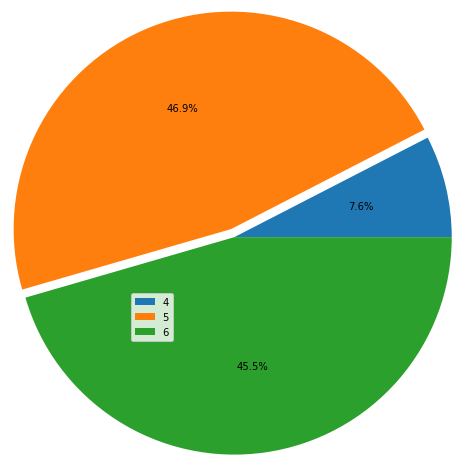

In [1977]:
explode = [0,0.1,0]
plt.pie([traits_num.count(4),traits_num.count(5),traits_num.count(6)], explode=explode, autopct='%1.1f%%', radius=2.5)
plt.legend(['4','5','6'], loc='lower left')

In [1575]:
def space_toadz_attributes(dict_key, sp_val, nft_attributes_i, attr_val):
    sp_val = None
    for j in range(0,len(nft_attributes_i)):
        if nft_attributes[i][j][1] == attr_val:
            sp_val = nft_attributes[i][j][0] 
            space_toadz[dict_key].append(back)
    if sp_val == None:
        space_toadz[dict_key].append('no attribute'+attr_val)
    return

Creating dictionary with toad with every attribute in separte column, and adding *no attribute* information to empty cells. 

In [1715]:
space_toadz = { 'token_id' : [],
                'name' : [],
                'image' : [],
                'attributes' : [],
                'background' : [],
                'body' : [],
                'clothing' : [],
                'mouth' : [],
                'eyes' : [],
                'headware' : []
               }

for i in range(0,len(nft_name)):
    nft_token_id_i = nft_token_id[i] 
    space_toadz['token_id'].append(nft_token_id_i)
    nft_name_i = nft_name[i]
    space_toadz['name'].append(nft_name_i)
    nft_image_i = nft_image[i]
    space_toadz['image'].append(nft_image_i)
    nft_attributes_i = nft_attributes[i]
    
    space_toadz['attributes'].append(nft_attributes_i)


    back = None
    for j in range(0,len(nft_attributes_i)):
        if nft_attributes[i][j][1] == 'Background':
            back = nft_attributes[i][j][0] 
            space_toadz['background'].append(back)
    if back == None:
        space_toadz['background'].append('no attribute Background')
        
    body = None
    for r in range(0,len(nft_attributes_i)):
        if nft_attributes_i[r][1] == 'Body':
            body = nft_attributes_i[r][0] 
            space_toadz['body'].append(body)
    if body == None:
        space_toadz['body'].append('no attribute Body')
        
    cloth = None    
    for w in range(0,len(nft_attributes_i)):   
        if nft_attributes_i[w][1] == 'Clothing':
            cloth = nft_attributes_i[w][0] 
            space_toadz['clothing'].append(cloth)
    if cloth == None:
        space_toadz['clothing'].append('no attribute Clothing')

    eyes = None    
    for k in range(0,len(nft_attributes_i)):
        if nft_attributes_i[k][1] == 'Eyes':
            eyes = nft_attributes_i[k][0] 
            space_toadz['eyes'].append(eyes)
    if eyes == None:
        space_toadz['eyes'].append('no attribute Eyes')
    
    mouth = None    
    for m in range(0,len(nft_attributes_i)):   
        if nft_attributes_i[m][1] == 'Mouth':
            mouth = nft_attributes_i[m][0] 
            space_toadz['mouth'].append(mouth)
    if mouth == None:
        space_toadz['mouth'].append('no attribute Mouth')   

    headwear = None    
    for n in range(0,len(nft_attributes_i)):   
        if nft_attributes_i[n][1] == 'Headware':
            headwear = nft_attributes_i[n][0] 
            space_toadz['headware'].append(headwear)
    if headwear == None:
        space_toadz['headware'].append('no attribute Headware') 

In [1716]:
len(space_toadz['name'])

6833

In [1717]:
space_toadz['headware']

['Space Helmet Yellow',
 'Ribbutnzle',
 'Space Helmet Blue',
 'Martian',
 'Space Helmet Blue',
 'no attribute Headware',
 'Space Helmet Blue',
 'no attribute Headware',
 'no attribute Headware',
 'Halo',
 'Mohawk',
 'Caesar',
 'Ribbutnzle',
 'Swamp Hat',
 'no attribute Headware',
 'no attribute Headware',
 'Elvis',
 'Tough Toad',
 'Caesar',
 'no attribute Headware',
 'Ribbutnzle',
 'Jetpack',
 'Caesar',
 'Ribbutnzle',
 'Space Helmet Swamp',
 'Purple 90s',
 'Space Helmet Blue',
 'no attribute Headware',
 'Space Helmet Yellow',
 'Caesar',
 'Caesar',
 'Alien Frogger',
 'Alien Frogger',
 'Martian',
 'Elvis',
 'no attribute Headware',
 'Ninja',
 'no attribute Headware',
 'no attribute Headware',
 'Ribbutnzle',
 'no attribute Headware',
 'Alien Frogger',
 'Elvis',
 'Elvis',
 'Space Helmet Yellow',
 'Magician',
 'Caesar',
 'Froggy Style',
 'no attribute Headware',
 'no attribute Headware',
 'no attribute Headware',
 'Ribbutnzle',
 'Alien Frogger',
 'Mohawk',
 'Space Helmet Yellow',
 'no attri

In [1718]:
space_toadz_df = pd.DataFrame.from_dict(space_toadz)
space_toadz_df

token_id              name  \
0         5025       Yummy Elana   
1         5015           Valinto   
2         5073    Delicate Masha   
3         3641  Aggregate Hadria   
4         6116        Gilbertina   
...        ...               ...   
6828       201             Bogey   
6829       367            Alanna   
6830      2450       Sound Mercy   
6831      2230   Rival Mirabella   
6832      2234      Cookie Dough   

                                                  image  \
0     ipfs://bafybeia34tpetysqmmkbadkdyeffcfluvi4xwk...   
1     ipfs://bafybeihnjnjx34pnkgbrpl7qeee65stis5hhoo...   
2     ipfs://bafybeieyur3whdpucqhezj6n3ydmlrzcjtgbj4...   
3     ipfs://bafybeia4i345dn2litjr7o5rthiuttufxuwwc2...   
4     ipfs://bafybeibsgfpxfdjs5hdunvow5waw2v4lqtqwjg...   
...                                                 ...   
6828  ipfs://bafybeifufxojvgsk4or2h5lzuu7wlxot2qowup...   
6829  ipfs://bafybeibulpt3k3pke5qcacilmp3k2gzpiafse2...   
6830  ipfs://bafybeihhm3feharwkapdieils3f4ovf4xpfdnz...   
6831  ipfs://bafybeieg6fij4h52avjz5vtc2k3g3q3qivwdw4...   
6832  ipfs://bafybeicgbnw5737rduwjwx2poiviu4ieeklwpt...   

                                             attributes      background  \
0     [[Purple Digital, Background], [Marshian, Body...  Purple Digital   
1     [[Orange Lights, Background], [Invader, Body],...   Orange Lights   
2     [[Purple Digital, Background], [Ape, Body], [S...  Purple Digital   
3     [[Mystery, Background], [Old, Body], [Narrow B...         Mystery   
4     [[Digital, Background], [Ghost, Body], [Hilbil...         Digital   
...                                                 ...             ...   
6828  [[Purple Digital, Background], [Lava, Body], [...  Purple Digital   
6829  [[Night Sky, Background], [Striped Mars, Body]...       Night Sky   
6830  [[Orange Lights, Background], [Active, Body], ...   Orange Lights   
6831  [[Mystery, Background], [Active, Body], [Sad, ...         Mystery   
6832  [[Groovy, Background], [Active, Body], [Breaki...          Groovy   

              body               clothing         mouth       eyes  \
0         Marshian           Yellow Space         Blank        ZZZ   
1          Invader  no attribute Clothing     Blue Grin      Bored   
2              Ape  no attribute Clothing           Sad  Stink Eye   
3              Old  no attribute Clothing  Narrow Blank        Sad   
4            Ghost  no attribute Clothing      Hilbilly        Sad   
...            ...                    ...           ...        ...   
6828          Lava  no attribute Clothing      Hilbilly        Sad   
6829  Striped Mars  no attribute Clothing    Blank Lips         3D   
6830        Active             Pink Space     Blue Grin   Aww Yeah   
6831        Active  no attribute Clothing           Sad        ZZZ   
6832        Active          Breaking Toad     Blue Grin      Bored   

                   headware  
0       Space Helmet Yellow  
1                Ribbutnzle  
2         Space Helmet Blue  
3                   Martian  
4         Space Helmet Blue  
...                     ...  
6828       Arribit Einstein  
6829  no attribute Headware  
6830                 Mohawk  
6831                Martian  
6832          Alien Frogger  

[6833 rows x 10 columns]

In [1580]:
body_df = space_toadz_df.groupby(by='body').count()
body_df.name

body
Active            743
Albino            656
Ape               392
Disco             682
Ghost             436
Invader           362
Lava              141
Marshian          569
Old               582
Purple Spotted    390
Sewer             146
Space             143
Striped Mars      609
Terra              80
Tiger             360
Toadz             462
Zombie             80
Name: name, dtype: int64

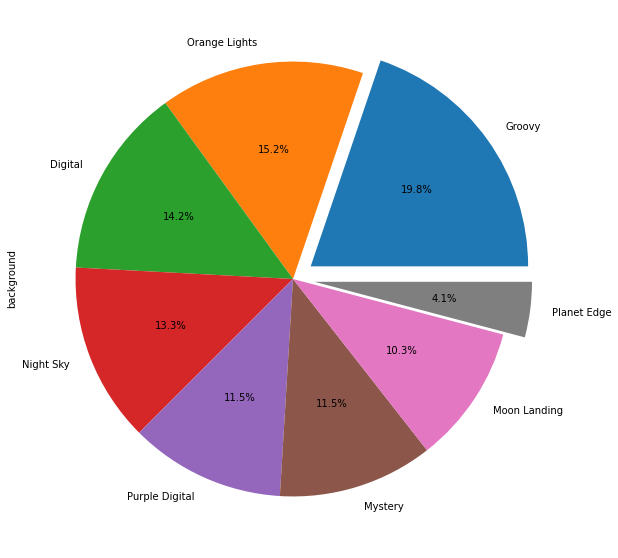

In [1933]:
explode = [0.1,0,0,0,0,0,0,0.1]
space_toadz_df.background.value_counts().plot(kind='pie', figsize=(12,10), explode=explode, autopct='%1.1f%%')

In [1585]:
space_toadz_df.background.value_counts()/6833

Groovy            0.197863
Orange Lights     0.152056
Digital           0.141665
Night Sky         0.133324
Purple Digital    0.115469
Mystery           0.115323
Moon Landing      0.103176
Planet Edge       0.041124
Name: background, dtype: float64

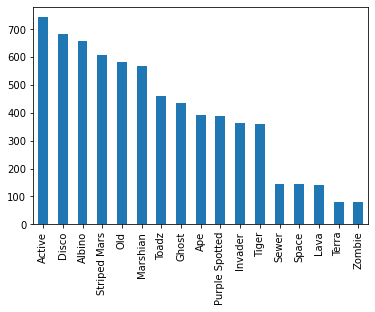

In [1939]:
space_toadz_df.body.value_counts().plot(kind='bar')

In [1583]:
space_toadz_df.body.value_counts()/6833

Active            0.108737
Disco             0.099810
Albino            0.096005
Striped Mars      0.089126
Old               0.085175
Marshian          0.083272
Toadz             0.067613
Ghost             0.063808
Ape               0.057369
Purple Spotted    0.057076
Invader           0.052978
Tiger             0.052685
Sewer             0.021367
Space             0.020928
Lava              0.020635
Terra             0.011708
Zombie            0.011708
Name: body, dtype: float64

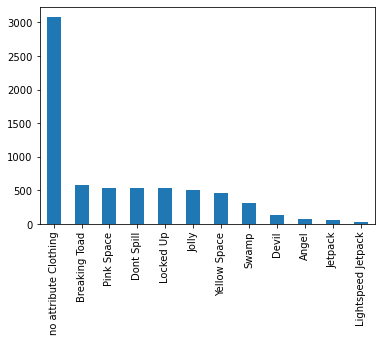

In [1934]:
space_toadz_df.clothing.value_counts().plot(kind='bar')

In [1588]:
space_toadz_df.clothing.value_counts()/6833

no attribute Clothing    0.450754
Breaking Toad            0.084004
Pink Space               0.078882
Dont Spill               0.078589
Locked Up                0.078150
Jolly                    0.074930
Yellow Space             0.066881
Swamp                    0.045222
Devil                    0.018733
Angel                    0.010537
Jetpack                  0.009513
Lightspeed Jetpack       0.003805
Name: clothing, dtype: float64

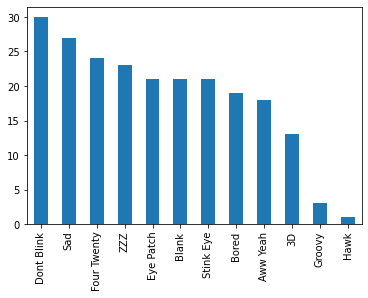

In [1445]:
space_toadz_df.eyes.value_counts().plot(kind='bar')

In [1699]:
space_toadz_df.eyes.value_counts()/6833

Blank          0.116347
Bored          0.115469
Stink Eye      0.113859
ZZZ            0.107420
Dont Blink     0.100249
Sad            0.097907
Aww Yeah       0.094248
3D             0.079175
Eye Patch      0.077272
Four Twenty    0.068784
Groovy         0.017708
Hawk           0.011562
Name: eyes, dtype: float64

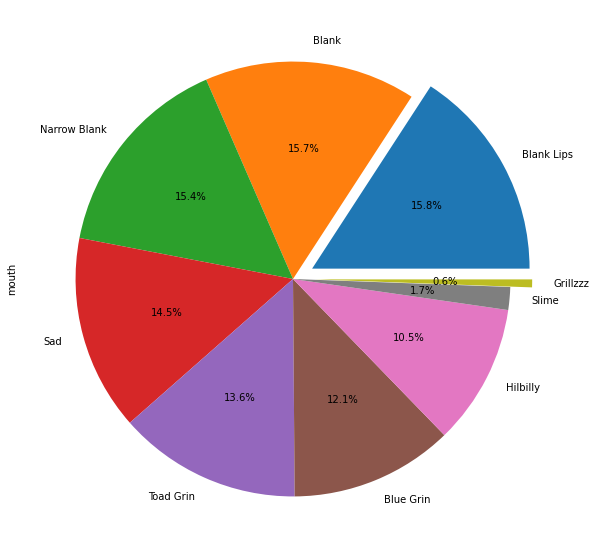

In [1937]:
explode = [0.1,0,0,0,0,0,0,0,0.1]
space_toadz_df.mouth.value_counts().plot(kind='pie', figsize=(12,10), explode=explode, autopct='%1.1f%%')

In [1590]:
space_toadz_df.mouth.value_counts()/6833

Blank Lips      0.158203
Blank           0.157178
Narrow Blank    0.154398
Sad             0.145178
Toad Grin       0.136251
Blue Grin       0.121323
Hilbilly        0.104639
Slime           0.016976
Grillzzz        0.005854
Name: mouth, dtype: float64

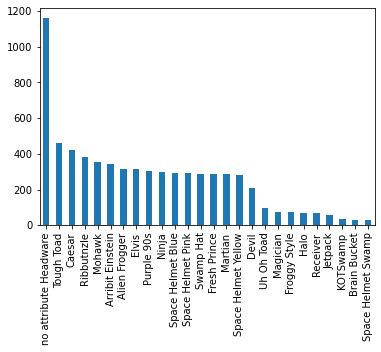

In [1591]:
space_toadz_df.headware.value_counts().plot(kind='bar')

In [1625]:
df_headware = space_toadz_df.headware.value_counts()/6833
df_headware = df_headware.to_frame()
df_headwear

In [1695]:
toad1t = space_toadz_df.where(space_toadz_df.background == 'Planet Edge')#, space_toadz_df.body == 'Zombie')
toad1t = toad1t[~toad1t['name'].isnull()]
toad1 = toad1t.where(space_toadz_df.body == 'Zombie')
toad1 = toad1[~toad1['name'].isnull()]
toad1

name                                              image  \
1658  Aesthetic Alanna  ipfs://bafybeigjky6nrbhtt32qn3rzy4gq2xtm3w6n6x...   
2306            Alyssa  ipfs://bafybeiftao5k44mapq5mruuwcjnr7jk3s6rdg4...   

                                             attributes   background    body  \
1658  [[Planet Edge, Background], [Zombie, Body], [J...  Planet Edge  Zombie   
2306  [[Planet Edge, Background], [Zombie, Body], [H...  Planet Edge  Zombie   

                   clothing       mouth       eyes           headware  
1658                  Jolly  Blank Lips  Eye Patch  Space Helmet Blue  
2306  no attribute Clothing    Hilbilly  Eye Patch   Arribit Einstein

In [1700]:
toad2t = space_toadz_df.where(space_toadz_df.mouth == 'Grillzzz')
toad2t = toad2t[~toad2t['name'].isnull()]
toad2 = toad2t.where(space_toadz_df.eyes == 'Groovy')
toad2 = toad2[~toad2['name'].isnull()]
toad2

name                                              image  \
5515         Alvinia  ipfs://bafybeif6xxq5xglwerdldd7c5jeszvlnxvqe6l...   
6627  Live Cherilynn  ipfs://bafybeieiv7mt6fojsc5mtl2ex5bitrviu7nz6r...   

                                             attributes background    body  \
5515  [[Night Sky, Background], [Old, Body], [Pink S...  Night Sky     Old   
6627  [[Digital, Background], [Albino, Body], [Grill...    Digital  Albino   

                   clothing     mouth    eyes   headware  
5515             Pink Space  Grillzzz  Groovy  Swamp Hat  
6627  no attribute Clothing  Grillzzz  Groovy     Caesar

In [1886]:
trans_anal = dict_trans_df_sort.join(space_toadz_df.set_index('token_id'), on=dict_trans_df_sort.index)
trans_anal

transaction                   name  \
token                                       
15           1.490                  Sassy   
26           2.000                 Belvia   
30           1.000        Promising Sella   
36           0.869        Fatal Cassandry   
58           1.690  Representative Darsey   
...            ...                    ...   
6892         3.000                   Doro   
6904         3.500              Millicent   
6916         0.990      Legislative Anita   
6918         1.500              Butternut   
6926         1.400         Mammoth Deidre   

                                                   image  \
token                                                      
15     ipfs://bafybeicud4ta5np63vbkja7qoyglrdbrmujvjq...   
26     ipfs://bafybeig7tuyexyfw76gd4i7uvl6dzjbt7daxvr...   
30     ipfs://bafybeidvrs3pvbnkjddx2jpvqlqgc6id2ocmmg...   
36     ipfs://bafybeicjqxfdofi427fxjrz2d35nm3a34yhgmj...   
58     ipfs://bafybeiechygbnftddxwuhk4bnbrjxijrqn5cd4...   
...                                                  ...   
6892   ipfs://bafybeidvt33fztqfmhr7ziybtq65k7kuyaiuqe...   
6904   ipfs://bafybeigto377ev5xoovizynujk7bgh3pa5fdds...   
6916   ipfs://bafybeigccekuq7zrbihpgtsovbdbwlchoyjfy2...   
6918   ipfs://bafybeieeaipfrjmcx6vvrqghxpjtwrrxegg3id...   
6926   ipfs://bafybeig5lpndgmpiryevkiukxlydmbo3xanyxd...   

                                              attributes     background  \
token                                                                     
15     [[Mystery, Background], [Toadz, Body], [Blank ...        Mystery   
26     [[Mystery, Background], [Lava, Body], [Pink Sp...        Mystery   
30     [[Mystery, Background], [Disco, Body], [Pink S...        Mystery   
36     [[Moon Landing, Background], [Ape, Body], [Hil...   Moon Landing   
58     [[Planet Edge, Background], [Tiger, Body], [To...    Planet Edge   
...                                                  ...            ...   
6892   [[Orange Lights, Background], [Marshian, Body]...  Orange Lights   
6904   [[Groovy, Background], [Marshian, Body], [Blue...         Groovy   
6916   [[Digital, Background], [Striped Mars, Body], ...        Digital   
6918   [[Night Sky, Background], [Lava, Body], [Break...      Night Sky   
6926   [[Night Sky, Background], [Old, Body], [Pink S...      Night Sky   

               body               clothing         mouth         eyes  \
token                                                                   
15            Toadz  no attribute Clothing    Blank Lips     Aww Yeah   
26             Lava             Pink Space    Blank Lips     Aww Yeah   
30            Disco             Pink Space         Blank    Stink Eye   
36              Ape  no attribute Clothing      Hilbilly        Blank   
58            Tiger  no attribute Clothing     Toad Grin        Bored   
...             ...                    ...           ...          ...   
6892       Marshian             Dont Spill     Toad Grin    Eye Patch   
6904       Marshian  no attribute Clothing     Blue Grin   Dont Blink   
6916   Striped Mars             Pink Space      Hilbilly  Four Twenty   
6918           Lava          Breaking Toad    Blank Lips          ZZZ   
6926            Old             Pink Space  Narrow Blank  Four Twenty   

                    headware  
token                         
15                     Elvis  
26                Uh Oh Toad  
30                     Ninja  
36                Tough Toad  
58                     Ninja  
...                      ...  
6892   no attribute Headware  
6904                   Elvis  
6916                 Martian  
6918              Tough Toad  
6926                 Martian  

[624 rows x 10 columns]

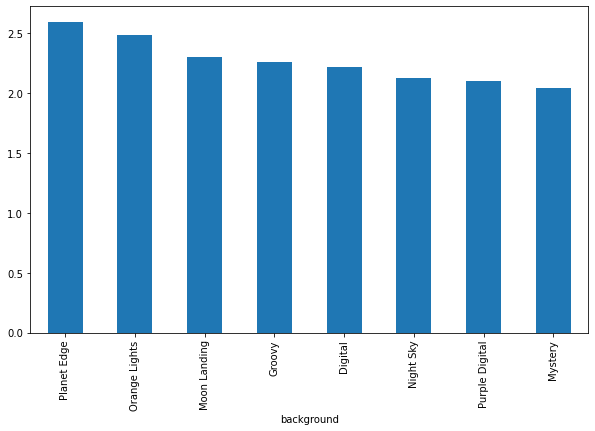

In [1911]:
trans_anal.groupby('background')['transaction'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,6))#, figsize=(15,10), autopct='%1.1f%%')

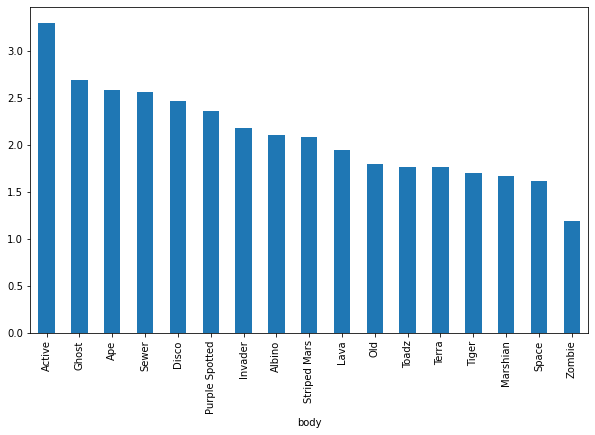

In [1912]:
trans_anal.groupby('body')['transaction'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,6))#, figsize=(15,10), autopct='%1.1f%%')

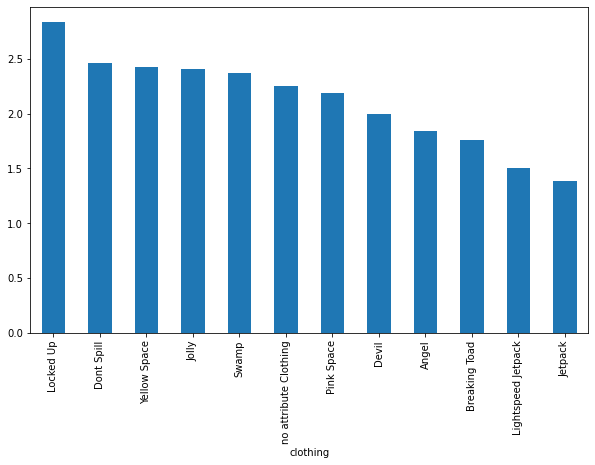

In [1913]:
trans_anal.groupby('clothing')['transaction'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,6))#, figsize=(15,10), autopct='%1.1f%%')

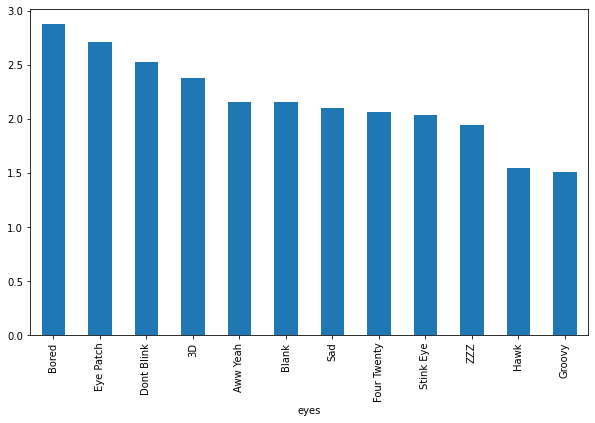

In [1915]:
trans_anal.groupby('eyes')['transaction'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,6))#, figsize=(15,10), autopct='%1.1f%%')

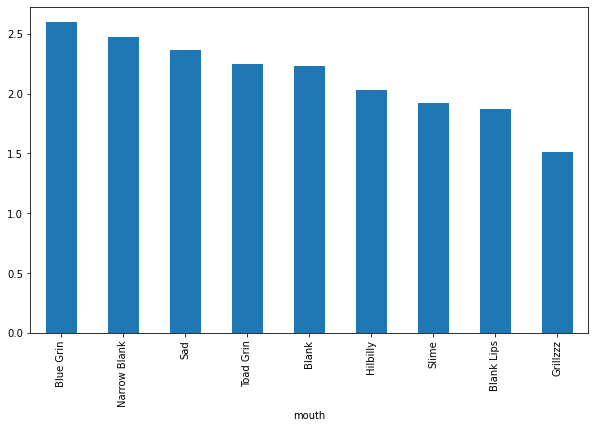

In [1916]:
trans_anal.groupby('mouth')['transaction'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,6))

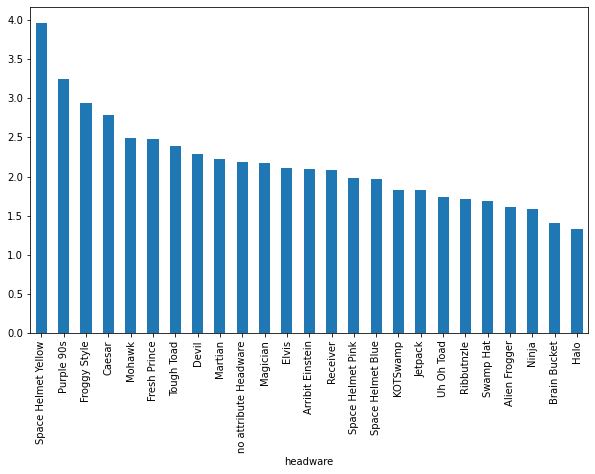

In [1918]:
trans_anal.groupby('headware')['transaction'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,6))#, figsize=(15,10), autopct='%1.1f%%')